#### Case Study 2:
# How do Users Bellabeat?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction and Goals
**Bellabeat** is a company that produces smart devices geared to the health of women. By way of the *Bellabeat app*, customers can connect several products such as ***Leaf***, their wearable tracker, ***Time***, their wearable tracker fitted into a stylish watch, and ***Spring***, a smart water bottle which tracks water and hydration.\
Cofounders **Urška Sršen** and **Sando Mur** are looking to grow their company to help more women focus on their health. Sršen believes that analyzing how their customers use their Bellabeat products can help guide the company into making well-informed decisions to grow.

In particular, the analysis will by guided by:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Data Preview: Transforming and Cleaning

In [2]:
# Load in data
activity = pd.read_csv('dailyActivity_merged.csv')
sleep = pd.read_csv('sleepDay_merged.csv')

hourlyCalories = pd.read_csv('hourlyCalories_merged.csv')
hourlyIntensities = pd.read_csv('hourlyIntensities_merged.csv')
hourlySteps = pd.read_csv('hourlySteps_merged.csv')

In [3]:
# Display activity
activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [4]:
# Display data types
activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

The `[ActivityDate]` column is not not formatted into a datetime. Otherwise, all other variables are of the correct data type.

In [5]:
# Update ActivityDate to a datetime
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%m/%d/%Y')
activity.ActivityDate.dtype

dtype('<M8[ns]')

`[ActivityDate]` is now in a datetime format.

According to the Kaggle description, *"thirty eligible Fitbit users consented to the submission of personal tracker data"*.

In [6]:
# Validate how many user data is present
print(activity.Id.value_counts())
print()
print(" Number of participants:", len(activity.Id.value_counts()))

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

 Number of participants: 33


As shown above, there are actually 33 users' data collected. Additionally, not all users had their data collected for the full 31 days. While that is not necessarily a problem, a certain user only has 4 days worth of data collected, which is unlikely to have enough data to make conclusions from. Thus, they will be removed.

In [7]:
# Filer out the user with 4 days of data
activity = activity[activity['Id']!= 4057192912]
activity = activity.reset_index(drop=True)
print(" Number of participants:", len(activity.Id.value_counts()))

 Number of participants: 32


Remove the user from the rest of the data.

In [8]:
# Remove user and reset indices
hourlyCalories = hourlyCalories[hourlyCalories['Id']!= 4057192912]
hourlyCalories = hourlyCalories.reset_index(drop=True)
hourlyIntensities = hourlyIntensities[hourlyIntensities['Id']!= 4057192912]
hourlyIntensities = hourlyIntensities.reset_index(drop=True)
hourlySteps = hourlySteps[hourlySteps['Id']!= 4057192912]
hourlySteps = hourlySteps.reset_index(drop=True)

In [9]:
# Collect Ids for each user
# This way, records can be aggregated by using the same Id number
users = []
for user_quantity in activity.Id.value_counts().items():
    users.append(user_quantity[0])
# Make sure users has 32 members
print(len(users))

32


## Analysis and Visualizations
From the data, we can look at 3 main categories: **Steps**, **Calories**, and **Sleep**.

### Steps and Calories
The summaries:

In [10]:
print('Steps')
print(activity['TotalSteps'].describe())

Steps
count      936.000000
mean      7654.149573
std       5089.649569
min          0.000000
25%       3789.750000
50%       7441.000000
75%      10733.500000
max      36019.000000
Name: TotalSteps, dtype: float64


Average daily step count of ***7,654 steps***. Most days have a recorded step count ***between 3,789 to 10,733 steps***.

In [11]:
print('Calories')
print(activity['Calories'].describe())

Calories
count     936.000000
mean     2305.019231
std       719.044516
min         0.000000
25%      1829.750000
50%      2134.000000
75%      2794.500000
max      4900.000000
Name: Calories, dtype: float64


Average daily calories burned is ***2,305*** with a spread of ***1,829 to 2,794***.

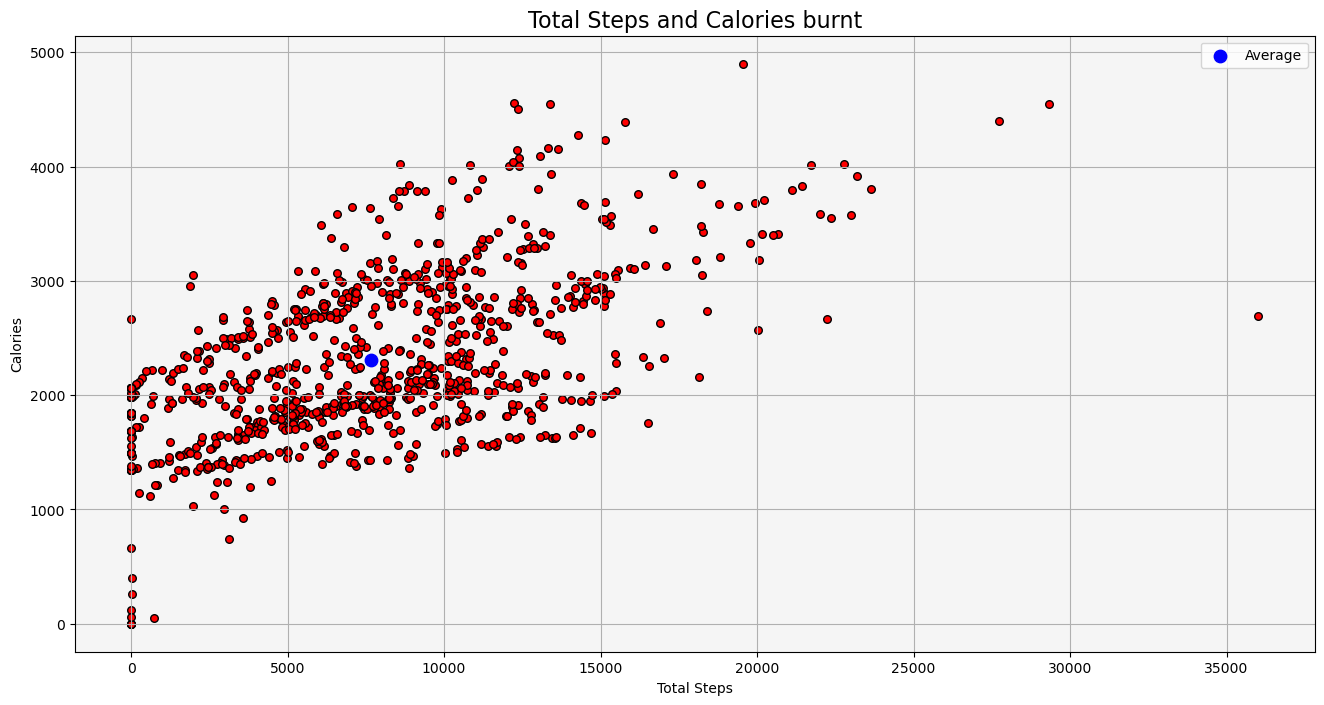

In [12]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)

ax.scatter(activity['TotalSteps'], activity['Calories'], s=30, color='r', edgecolors='black')
ax.scatter(7654, 2305, s=80, color='b', label='Average')
ax.set_facecolor('whitesmoke')
ax.set_title('Total Steps and Calories burnt', size=16)
ax.set_xlabel('Total Steps')
ax.set_ylabel('Calories')
ax.legend()

plt.grid()
plt.show()

A positive correlation. More steps means more calories burned, which should be expected.

We can encourage users to walk more to burn more calories. To do so, it would be good to know when, as sending a notification at 2 in the morning will likely be ignored compared to a notification later in the day.\
Fortunately, Bellabeat products can track how many steps are taken each day and each hour.

### Steps per hour

In [13]:
# Create date and hour columns
# Split teh ActivityHour string
hourlySteps[['Date', 'Hour']] = hourlySteps['ActivityHour'].str.split(n=1, expand=True)

# Update Date and Hour columns into datetime format
hourlySteps['Date'] = pd.to_datetime(hourlySteps['Date'], format='%m/%d/%Y')
hourlySteps['Hour'] = pd.to_datetime(hourlySteps['Hour'], format='%I:%M:%S %p')
print('Data type of "Date" column:', hourlySteps.Date.dtype)
print('Data type of "Hour" column:', hourlySteps.Hour.dtype)

Data type of "Date" column: datetime64[ns]
Data type of "Hour" column: datetime64[ns]


We can also translate the `[Hour]` column into a more readable 12 Hour clock format.

In [14]:
# Create a list to store Hour into a 12 hour clock

# List to store 12 hour clock
new_hours = []

for long_hour in hourlySteps['Hour'].unique():
    # Extract the numbers and convert to a numerical form for math
    short_hour = (str(long_hour)[11:13])
    short_hour = int(short_hour)
    
    # Convert to 12 hour clock
    if short_hour <= 12:
        if short_hour == 0:
            short_hour = '12 AM'
        elif short_hour == 12:
            short_hour = '12 PM'
        else:
            short_hour = str(short_hour) + ' AM'
    else:
        short_hour = short_hour - 12
        short_hour = str(short_hour) + ' PM'
    
    new_hours.append(short_hour)

Now, we collect the average steps per hour over the days tracked.

In [15]:
# Find the average steps per hour
average_steps = []
# Run through all the hour values
for hour_of_day in hourlySteps['Hour'].unique():
    # all_steps = Total count of steps by users per hour
    # count = Total count of occurances of the hour
    all_steps = 0
    count_steps = 0
    # Loop through the rows of date
    for row in range(len(hourlySteps)):
        if hourlySteps['Hour'][row] == hour_of_day:
            all_steps += hourlySteps['StepTotal'][row]
            count_steps += 1
    # Collect the average
    average_steps.append(all_steps / count_steps)

# Contain the rounded average steps
rounded_average_steps = [round(ave_steps) for ave_steps in average_steps]

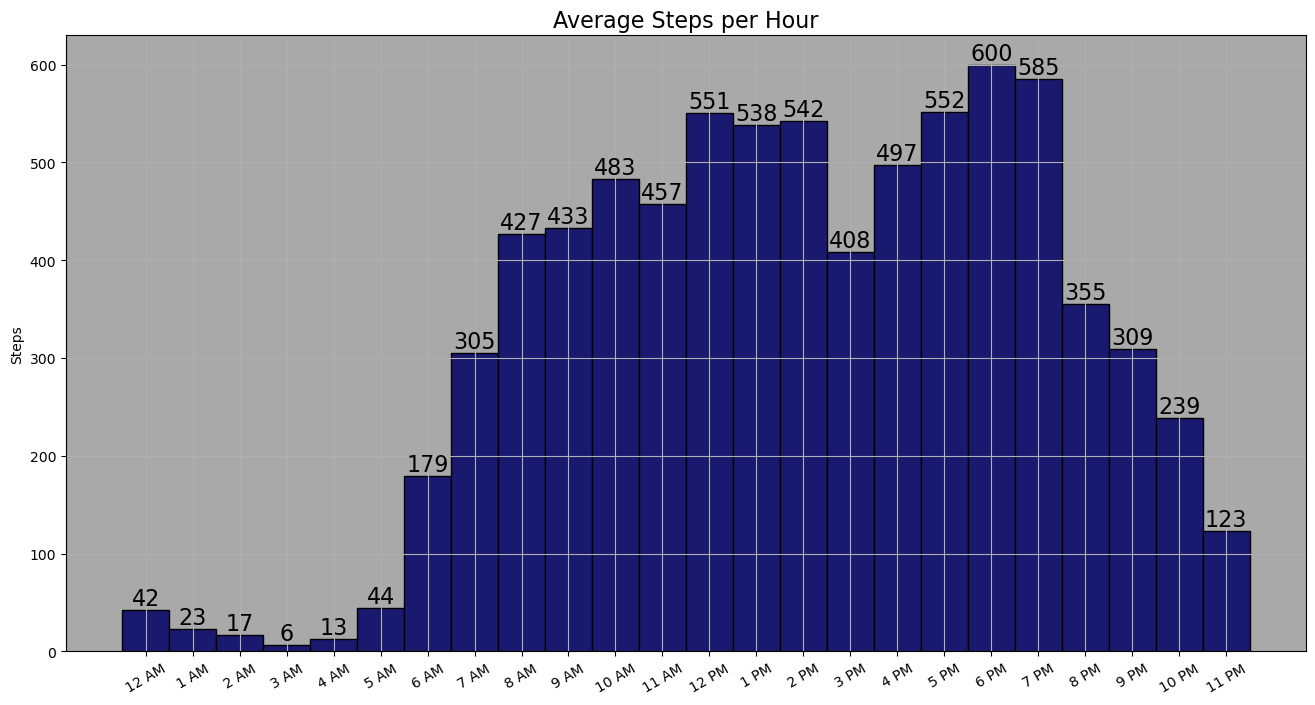

In [16]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)

sleep_and_steps = ax.bar(new_hours, rounded_average_steps, width=1, edgecolor = 'black', color='midnightblue')
ax.bar_label(sleep_and_steps, labels=rounded_average_steps, size=16)
ax.tick_params(axis='x', labelrotation=30)
ax.set_facecolor('darkgrey')
ax.set_title('Average Steps per Hour', size=16)
ax.set_ylabel('Steps')

plt.grid()
plt.show()

Obviously, users walk more during the day and less so in the night. A good night's sleep should be respected. **Average steps** appear in an **overall upward trend between 6 AM and 6 PM** with a dip in 3 PM. Followed by a downward trend as the evening rolls in.

There are two peaks of high step count: **12 PM - 2 PM** and **5 PM - 7 PM**. The *12 to 2 PM* activity spike is likely due to the time being when lunch is, and not a designated time for physical activity. The *5 to 7 PM* activity is also located around a mealtime, but is also the day's peak activity for steps, making it more likely to be an evening stroll and/or session of physical activity.

We should also note that there is **a spike in average steps at 4 PM** which starts a similar rate of average steps per hour to 6 PM (~50 step difference between hours). Bellabeat could encourage users by reminder notifications or via social media to start being more active earlier in the afternoon. 

If not already implemented, Bellabeat could set up an option to set reminders for these late afternoon / evening hours for users to get some more steps in.

### Calories burned per hour

A plot of average calories burned per hour of the day will likely show a similar trend, but we can still verify.\
Because the hours are the same, we can safely reuse the `hourlySteps['Hour']` column for the time.

In [17]:
# Find the average calories per hour
average_calories = []
# Run through all the hour values
for hour_of_day in hourlySteps['Hour'].unique():
    # all_calories = Total count of calories by users per hour
    # calorie_i = Total count of occurances of the hour
    all_calories = 0
    calorie_i = 0
    # Loop through the rows of date
    for row in range(len(hourlySteps)):
        if hourlySteps['Hour'][row] == hour_of_day:
            all_calories += hourlyCalories['Calories'][row]
            calorie_i += 1
    # Collect the average
    average_calories.append(all_calories / calorie_i)

# Contain the rounded average steps
rounded_average_calories = [round(ave_calories) for ave_calories in average_calories]

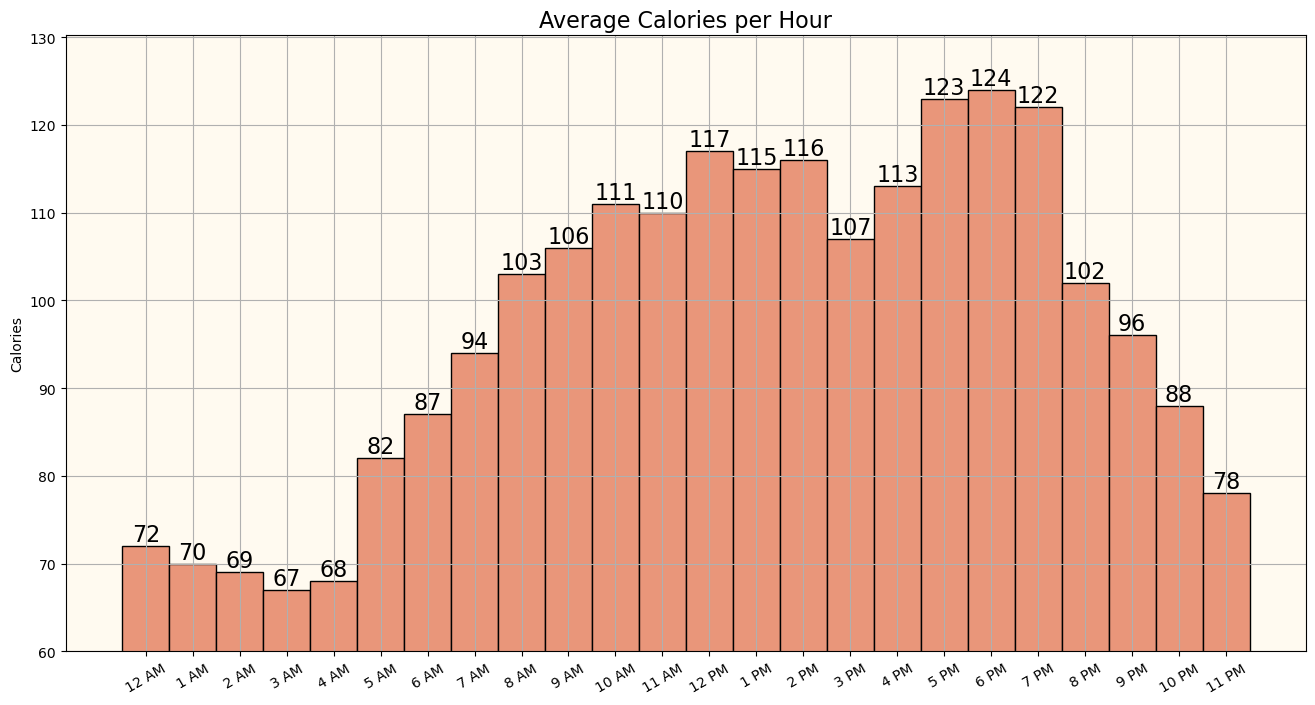

In [18]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)

calories_in_day = ax.bar(new_hours, rounded_average_calories, width=1, edgecolor = 'black', color='darksalmon')
ax.bar_label(calories_in_day, labels=rounded_average_calories, size=16)
ax.set_ylim(bottom=60)
ax.tick_params(axis='x', labelrotation=30)
ax.set_facecolor('floralwhite')
ax.set_title('Average Calories per Hour', size=16)
ax.set_ylabel('Calories')
plt.grid()

plt.show()

As expected, calories are burned more during the waking hours.

### Active minutes per day ###
From the `Activity` data, there are 4 variables that describe the amount of active minutes recorded per day, per user. These variables are labelled: `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes`, adn `SedentaryMinutes`; describing the type of activity the tracker would monitor.

In [19]:
sedentary = []
lightly = []
fairly = []
very = []

# Loop through the days
for day in activity['ActivityDate'].unique():
    # Starting minute sums per day
    sedentary_day = 0
    lightly_day = 0
    fairly_day = 0
    very_day = 0
    # loop through the rows per day
    for row in range(len(activity)):
        if activity['ActivityDate'][row] == day:
            sedentary_day += activity['SedentaryMinutes'][row]
            lightly_day += activity['LightlyActiveMinutes'][row]
            fairly_day += activity['FairlyActiveMinutes'][row]
            very_day += activity['VeryActiveMinutes'][row]
    # 31 days are recorded. Find averages
    sedentary_day = sedentary_day/31
    lightly_day = lightly_day/31
    fairly_day = sedentary_day/31
    very_day = very_day/31
    # Collect the averages
    sedentary.append(sedentary_day)
    lightly.append(lightly_day)
    fairly.append(fairly_day)
    very.append(very_day)

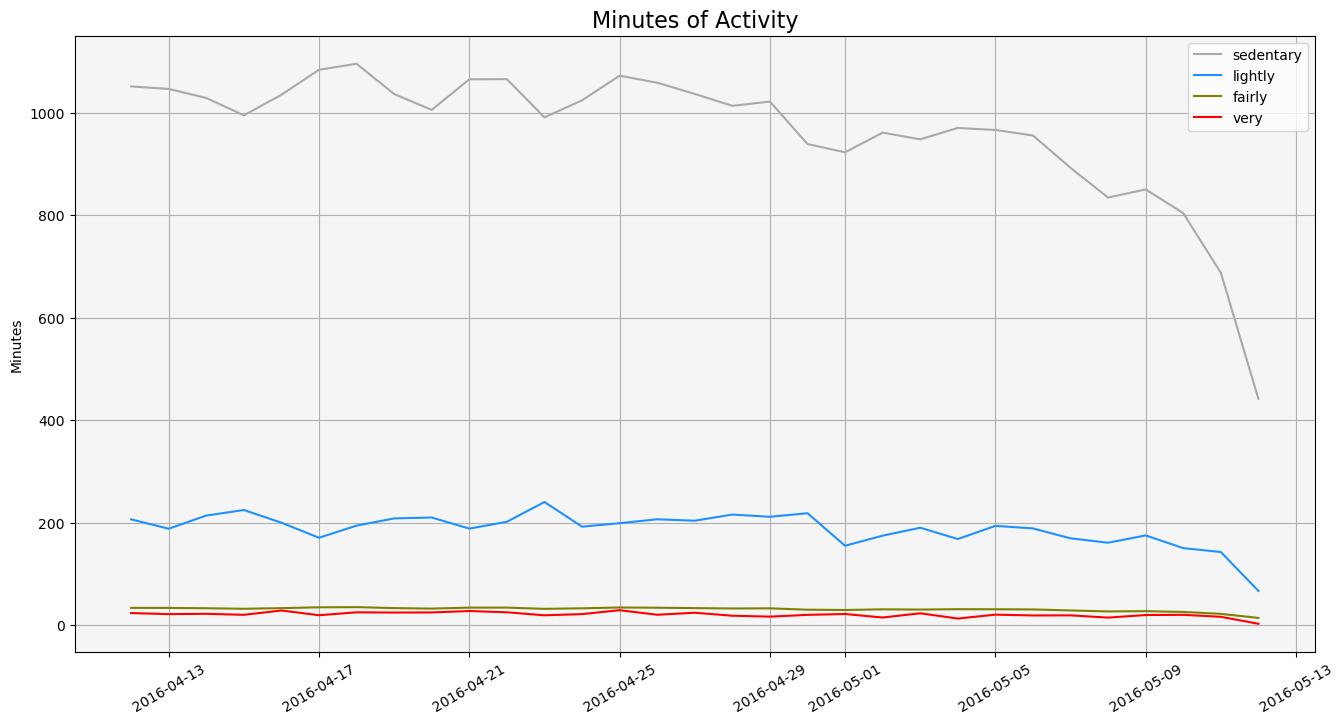

In [20]:
# Plot
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)

ax.plot(activity['ActivityDate'].unique(), sedentary, label='sedentary', color='darkgrey')
ax.plot(activity['ActivityDate'].unique(), lightly, label='lightly', color='dodgerblue')
ax.plot(activity['ActivityDate'].unique(), fairly, label='fairly', color='olive')
ax.plot(activity['ActivityDate'].unique(), very, label='very', color='red')
ax.set_facecolor('whitesmoke')
ax.tick_params(axis='x', labelrotation=30)
ax.set_title('Minutes of Activity', size=16)
ax.set_ylabel('Minutes')
ax.legend()

plt.grid()
plt.show()

Barring the last 2 days from inadequate data, there is a visible decrease in sedentary and lightly-active activity in the month while fairly-active and very-active activity has been at a relatively consistent level. **Lightly-active** is at an average of **200 minutes per day, which is about 3 hours and 20 minutes**. Why there is a decrease in in sedentary and lightly-active is not known and more analysis will be needed. It is possible that some users opted out of data sharing for the last couple weeks.\
Note the minutes of sedentary activity. Before the decrease in May, the **sedentary averages around 1000 minutes**. This is approximately 16 hours. Assuming half (8) of those hours is for sleep, that still leaves 8 more hours of sedentary activity.


Regardless, **most Bellabeat users are not focused on intensive workouts** or heavy cardio exercise as shown by the low average time for fairly and very active minutes (olive and red). The company should focus on this aspect of their brand, whether it is advertising, social media challenges, or making products that are associated with **light activity workouts**.

### Hours of Sleep

In [21]:
print('Sleep')
print(sleep['TotalMinutesAsleep'].describe())

Sleep
count    413.000000
mean     419.467312
std      118.344679
min       58.000000
25%      361.000000
50%      433.000000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64


Average sleeping time is about **420 minutes**, which is *7 hours*. The median is 433 minutes.

Both values are within the recommended hours of sleep of 7 to 9 hours.

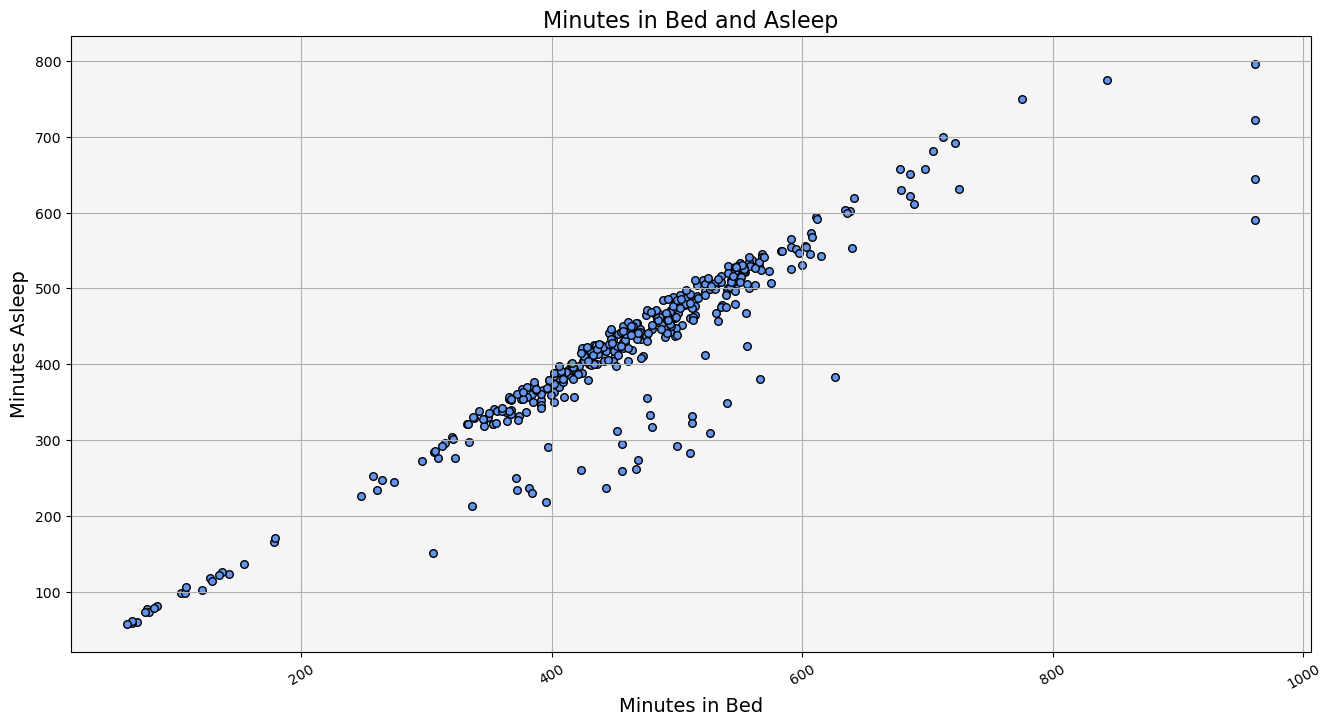

In [22]:
# Plot
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)

ax.scatter(sleep['TotalTimeInBed'], sleep['TotalMinutesAsleep'], s=30, color='cornflowerblue', edgecolors='black')
ax.set_facecolor('whitesmoke')
ax.tick_params(axis='x', labelrotation=30)
ax.set_title('Minutes in Bed and Asleep', size=16)
ax.set_xlabel('Minutes in Bed', size=14)
ax.set_ylabel('Minutes Asleep', size=14)

plt.grid()
plt.show()

There is a positive correlation between the two variables which is expected. Ideally, the minutes in bed and asleep will be very close to another, but there is a patch of records of less sleeptime for the amound spent in bed. This is likely due to a single participant.


There are some data points, i.e, most likely single users, that have less than 7 hours of sleep (420 minutes). Bellabeat should try to encourage and remind their users the importance of sleeping 7-9 hours each night.

### Activity and Sleep

In [23]:
# To deal with warnings in creating sleep_edit
import warnings
warnings.filterwarnings('ignore')

sleep_edit = sleep

# Create new dataframe called sleep_edit by stripping extra time text
for row in range(len(sleep)):
    sleep_edit['SleepDay'][row] = sleep['SleepDay'][row].strip('12:00:00 AM')
    
# Update SleepDay to a datetime
sleep_edit['SleepDay'] = pd.to_datetime(sleep_edit['SleepDay'], format='%m/%d/%Y')
sleep_edit.SleepDay.dtype

# rename SleepDay column to match Activity Date in activity
sleep_edit = sleep_edit.rename(columns={'SleepDay': 'ActivityDate'})

# Left Join merge the dataframes
sleep_edit = pd.merge(left = sleep_edit, right = activity, how = 'left', 
                      left_on = ['Id', 'ActivityDate'], right_on=['Id', 'ActivityDate'])

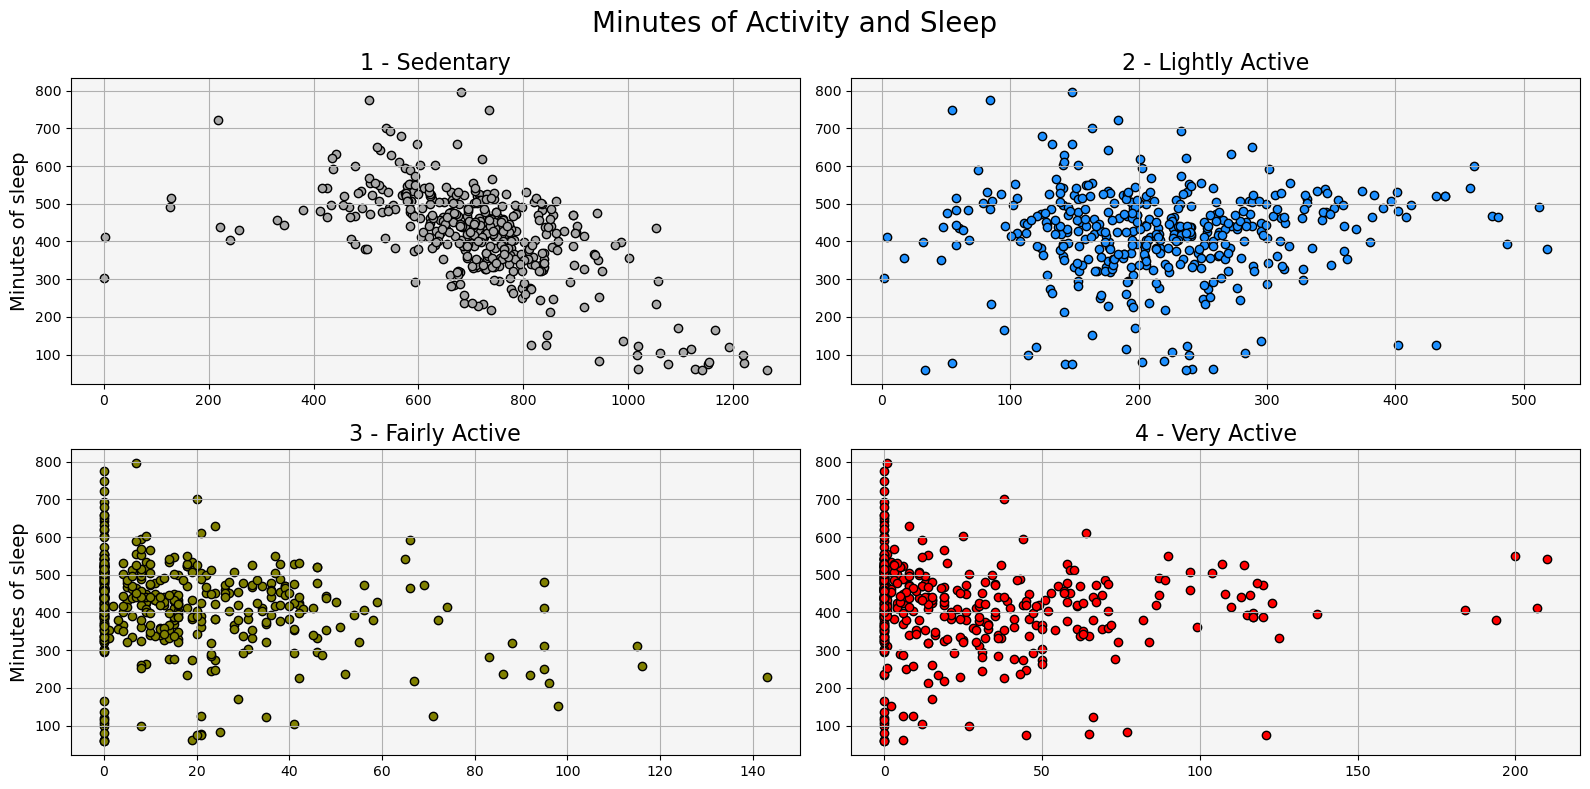

In [24]:
# Visualize
fig, ax = plt.subplots(2,2)
fig.set_figwidth(16)
fig.set_figheight(8)
fig.suptitle('Minutes of Activity and Sleep', size=20)

# Sedentary
ax[0,0].scatter(sleep_edit['SedentaryMinutes'], sleep_edit['TotalMinutesAsleep'], color='darkgrey', edgecolors='black')
ax[0,0].set_title('1 - Sedentary', size=16)
ax[0,0].set_facecolor('whitesmoke')
ax[0,0].set_ylabel('Minutes of sleep', size=14)
ax[0,0].grid()
# Lightly Active
ax[0,1].scatter(sleep_edit['LightlyActiveMinutes'], sleep_edit['TotalMinutesAsleep'], color='dodgerblue', edgecolors='black')
ax[0,1].set_title('2 - Lightly Active', size=16)
ax[0,1].set_facecolor('whitesmoke')
ax[0,1].grid()
# Fairly Active
ax[1,0].scatter(sleep_edit['FairlyActiveMinutes'], sleep_edit['TotalMinutesAsleep'], color='olive', edgecolors='black')
ax[1,0].set_title('3 - Fairly Active', size=16)
ax[1,0].set_facecolor('whitesmoke')
ax[1,0].set_ylabel('Minutes of sleep', size=14)
ax[1,0].grid()
# Very Active
ax[1,1].scatter(sleep_edit['VeryActiveMinutes'], sleep_edit['TotalMinutesAsleep'], color='red', edgecolors='black')
ax[1,1].set_title('4 - Very Active', size=16)
ax[1,1].set_facecolor('whitesmoke')
ax[1,1].grid()

fig.tight_layout()
plt.show()

The above plots show the relationships between minutes of each activity type (on the x-axis) and the minutes of sleep recorded (y-axis). In particular, **plot 1 shows a downward trend in minutes of sleep with the amount of sedentary activity**. The relationship in other activities show weak but positive correlations between said activities and sleep. We conclude that users should spend less time in sedentary activities and lead more acive lives to get the sleep they need. Bellabeat can help by reminding users on the *Bellabeat mobile app* or by other methods (social media, email, etc.).

## Summary and Recommendations
The data collected by Bellabeat brings insight to their customers. The relationships and correlations between step count, calories, and sleep brings ideas into Bellabeat's future marketing strategy and brand.

**The Bellabeat Community**\
As shown from the hourly data for steps and calories, Bellabeat users are not night owls. In addition, based on the hourly data for steps and calories, users have jobs or activies that are sedentary during the day (office, sitting on desk, etc.), spending around 8 waking hours to sedentary activity. Customers favor lightly intensive workouts around the early evening hours.

Our users are generally getting the 7 minimum hours of recommended sleep per night.

**How Bellabeat Can Help**\
With the above observations, there are a few suggestions on how how Bellabeat can market their brand and help the women they serve:

1. **Steps**\
Studies show that more steps per day decrease health and mortality risks. There are different recommendations for the number of steps per day, per age range, with a catch-all average of 7,000 steps.\
While most daily records meet this number, about half do not. Bellabeat can remind their users about the health benefits of meeting this goal.
2. **Calories**\
More steps burn more calories. If there is a calorie-tracking program, users could better manage their calorie intake and match it with the number being burned per day. This can encourage more steps and exercise.
3. **Exercise**\
Users spend a lot of time sitting down or being sedentary during the day, possibly from their job. Thus, not a lot of time to spend at the gym or do intensive workouts.\
Bellabeat can recommend light-activity workouts and exercises on their app and remind users to spend their evening hours being active.\
They can also focus on this aspect of their brand with encouraging daily challenges/goals for these workouts (e.g, a set number of jumping jacks per day? Or sets of sit ups?) from their app or social media. Possibly even make, or partner with a company that produces, gear that is associated with such workouts, such as yoga mats or wearable weights.
4. **Sleep**\
Less minutes being sedentary and sitting at a chair means less hours of sleep. While most users are reaching the minimum 7 hours of sleep per night, not all are. In addition, to improve sleep quality, 9 hours of sleep is ideal.\
Bellabeat can use each user's sleeping data to recommend the best time to go to bed to get their 7-9 hours of sleep, and send notifications in the evening hours.